# Кластеризация на основе плотности

> Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

> При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — **DBSCAN.** Далее мы рассмотрим его подробнее.

### DBSCAN (Density-based spatial clustering of applications with noise)

Данный алгоритм применим, если:

- перед вами стоит задача с данными сложной формы, например выделение районов на карте:

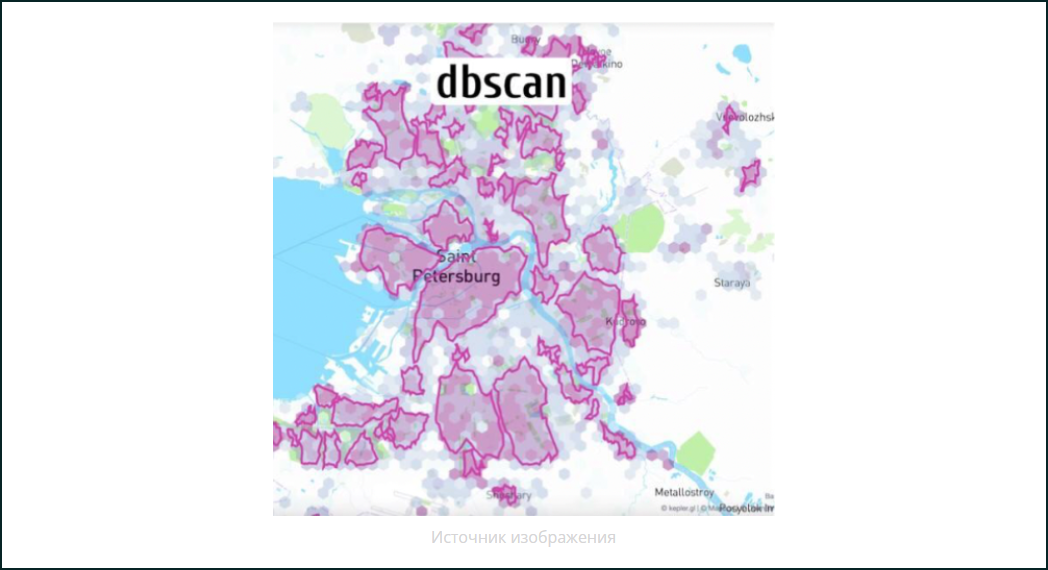

- в данных большое количество выбросов, например данные медицинских анализов пациентов.

В таких случаях ранее изученный алгоритм *k-means* не поможет. Зато на помощь придёт *DBSCAN.*

> **Преимущества алгоритма DBSCAN:**

> - В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
> - Алгоритм хорошо работает с данными произвольной формы.
> - DBSCAN отлично справляется с выбросами в датасетах.

Посмотрим на рисунок, где показано, как два разных алгоритма отрабатывают на разных данных. Первая строчка — это алгоритм DBSCAN, вторая — k-means. Данные имеют разное распределение: например, данные в первом столбце распределены в виде двух окружностей (синей и оранжевой), данные в четвёртом столбце — в виде трёх отдельных кластеров.

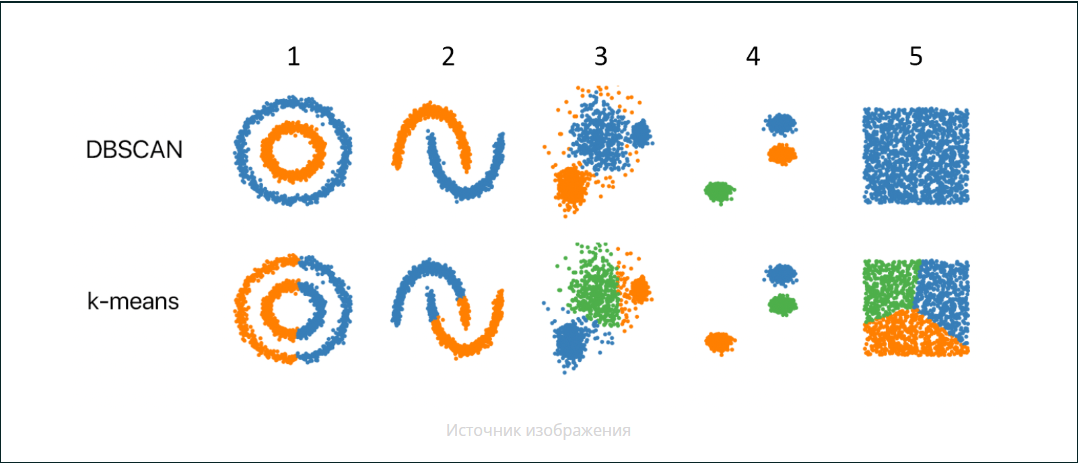

Как видим, если датасеты хорошо разделены, как в четвёртом случае, то оба алгоритма (*k-means и DBSCAN*) справляются хорошо.

В отличие от *k-means*, алгоритм *DBSCAN* отлично справился с кластеризацией данных под номерами 1 и 2.

Для случая под номером 3 результаты обоих алгоритмов кластеризации являются спорными. Более интуитивной кажется следующая интерпретация данных: нижнее скопление — первый кластер, среднее — второй, правое верхнее — третий. Наиболее разреженные и отдаленные точки, не попадающие ни в один кластер, можно отнести либо к ближайшему кластеру, либо к выбросам.

Особое внимание стоит обратить на решение задачи кластеризации в последнем, пятом случае:

- DBSCAN определил, что плотность точек примерно равномерна на всей площади распределения и отнес все точки к единому кластеру. Это связано с тем, что приведённые данные образуют один участок с одинаковой плотностью, из-за чего DBSCAN не может разделить такие данные на кластеры;
- Алгоритм k-means разделил данные на заранее заданные три кластера, что является иллюстрацией недостатка методов, где пользователь самостоятельно задаёт количество кластеров.

Давайте подробнее посмотрим, как работает DBSCAN. Допустим, у нас есть признаки  (значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

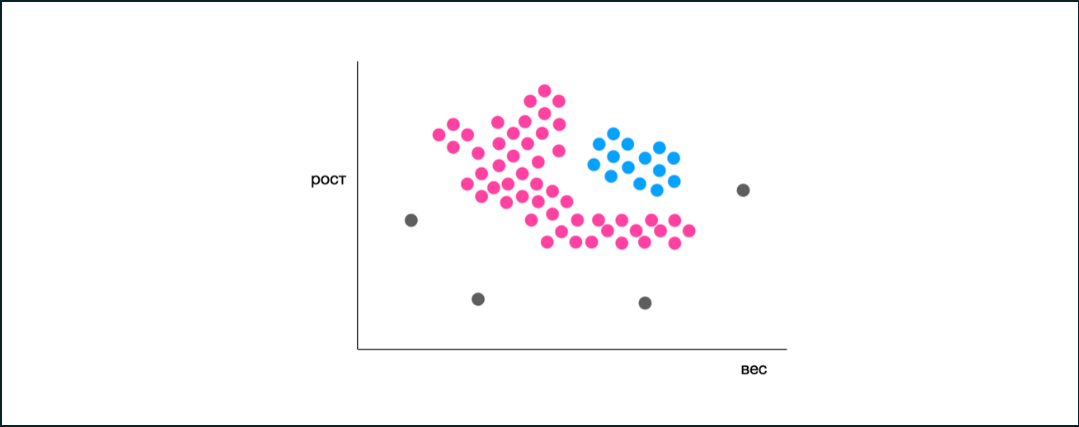

Так как розовый кластер огибает синий, у стандартных методов вроде *k-means* могут быть трудности при кластеризации. При использовании *k-means* мы можем получить следующие результаты:

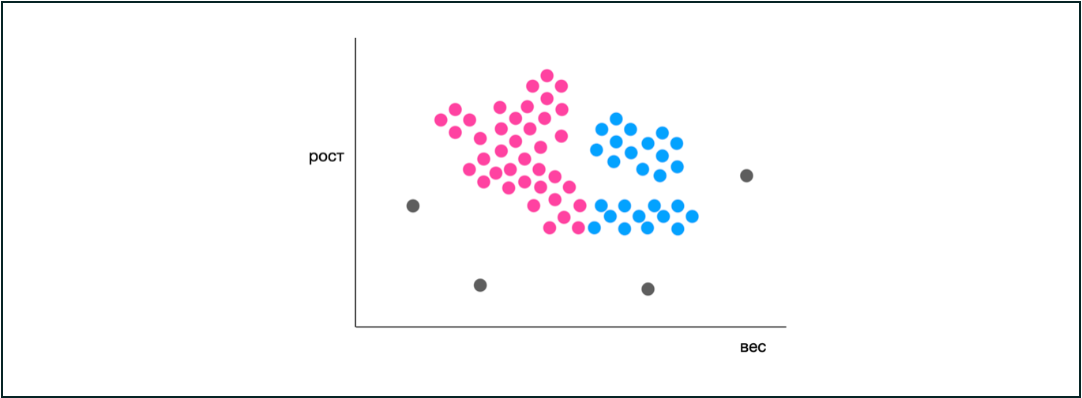

Алгоритм *DBSCAN* поможет не допустить такого.

> Чтобы понять, как он работает, вспомните, на какую информацию вы обращаете внимание, когда смотрите на данные и пытаетесь их кластеризовать. Обычно мы смотрим на плотность распределения данных: там, где большая плотность, и будет кластер, а точки, находящиеся в области низкой плотности, обычно считаются выбросами. Чтобы алгоритм кластеризовал данные, как человек, ему нужно кластеризовать, основываясь на плотности данных.

### Рассмотрим работу алгоритма кластеризации DBSCAN ↓

### 1. Сначала необходимо выбрать случайный объект в данных

(на рисунке выбранная точка выделена красным) и в некотором радиусе  от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

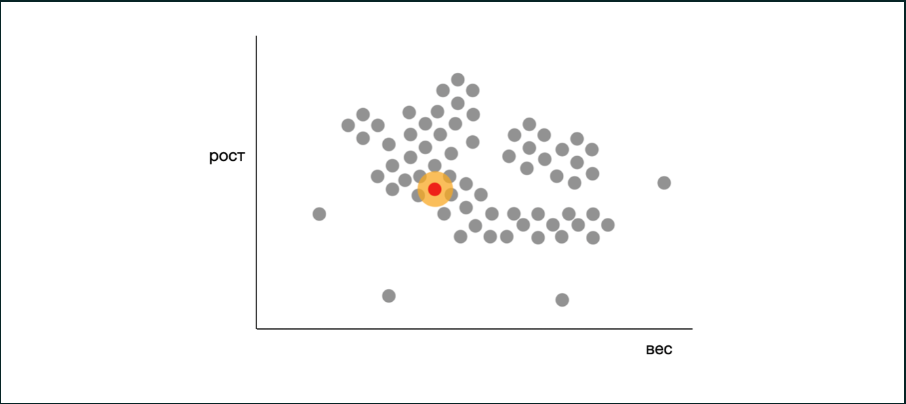

Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

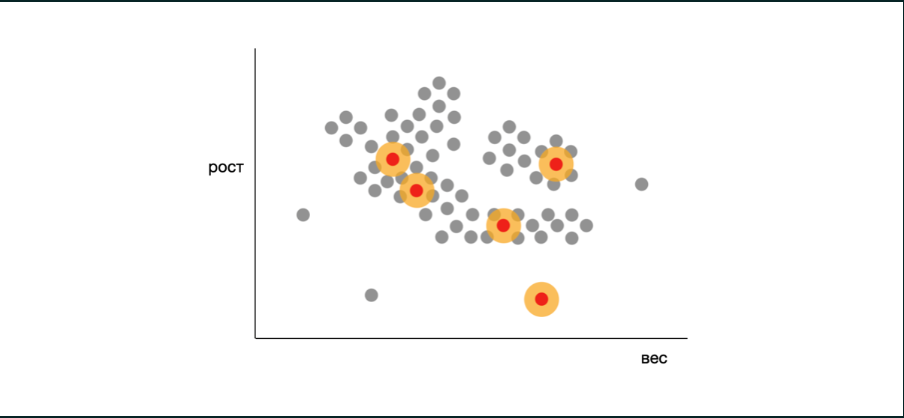

### 2. Выделим центральные точки (core points).

> **Центральными** будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

В наших данных четыре выделенные точки (красные точки на картинке выше) будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей.

Находим центральные точки во всём датасете. Это будет выглядеть так:

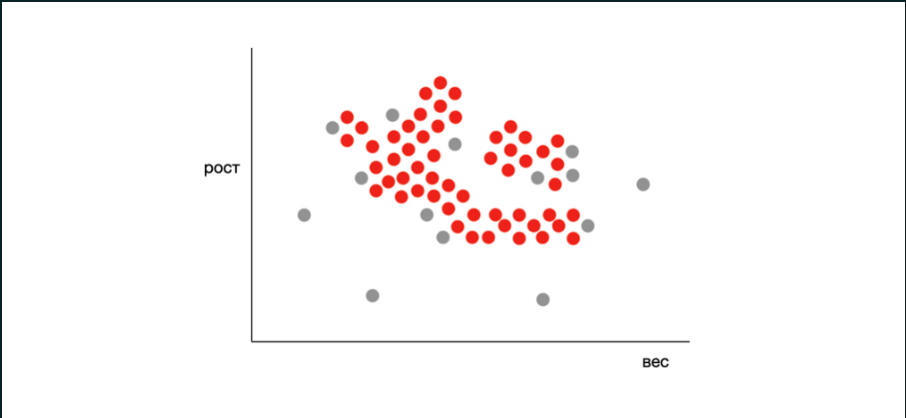

### 3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

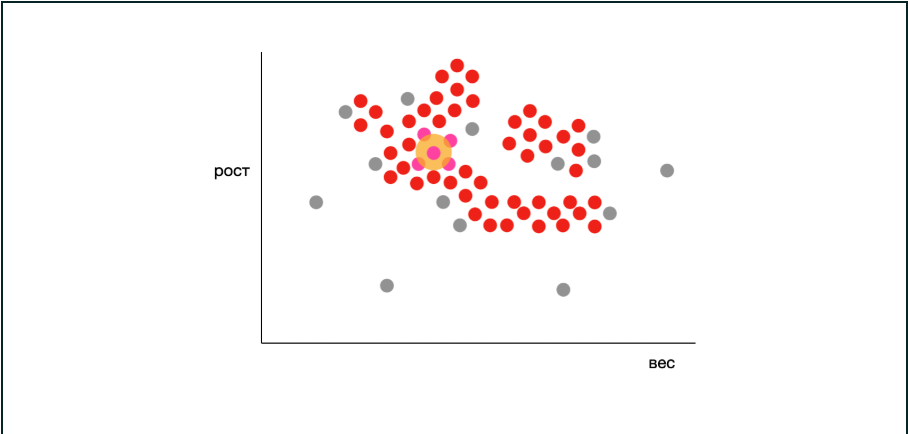

Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

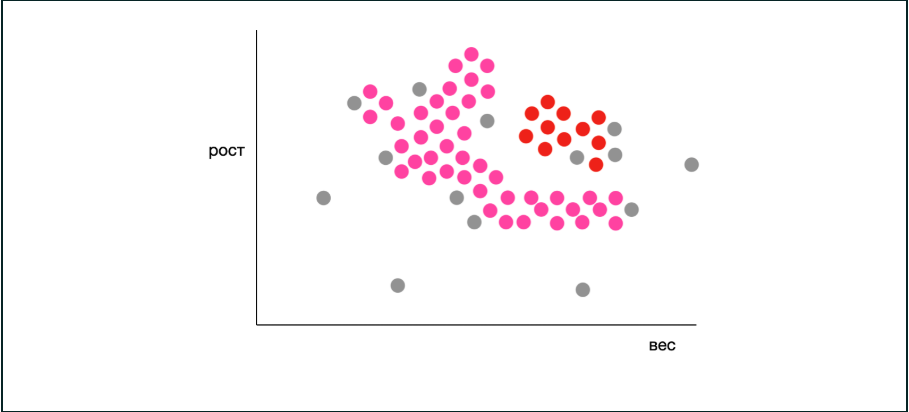

### 4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе r от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

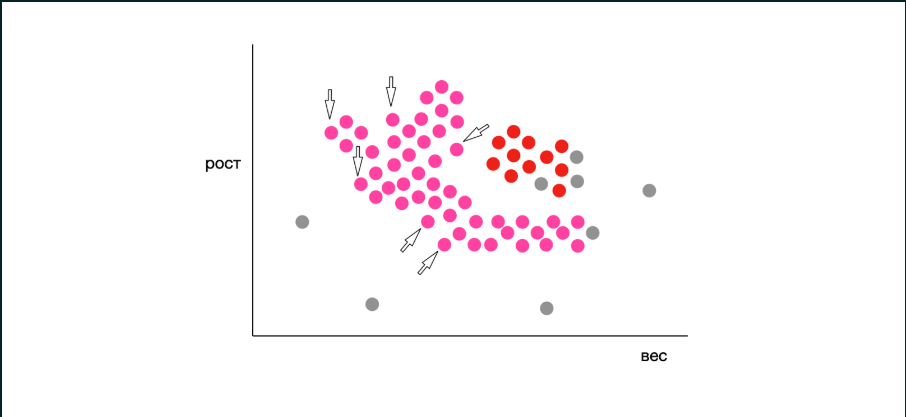

### 5. Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

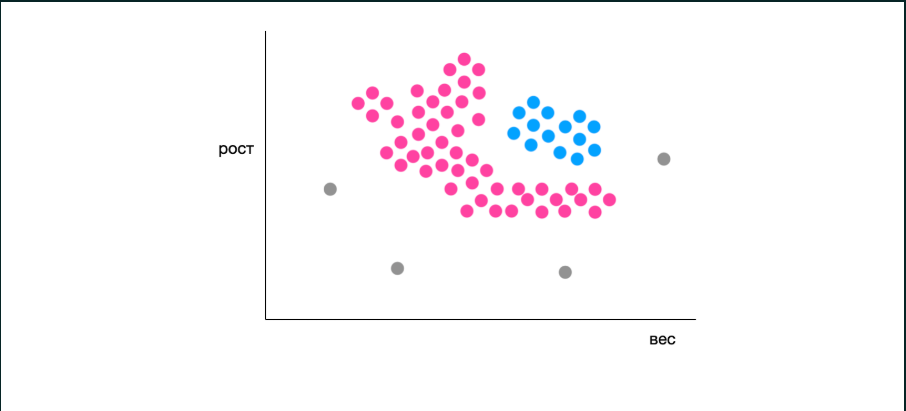

Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

### Для каких задач используется DBSCAN?

Данный алгоритм довольно популярный — областей его применения много.

- Можно использовать DBSCAN для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию

> Например, два покупателя оказались в одном кластере: один купил печенье, книгу и плед, а второй — только книгу и плед. На основе этой информации мы можем порекомендовать второму покупателю купить ещё и печенье.

- Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.

> Это свойство алгоритма можно использовать для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества.

- Часто DBSCAN применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

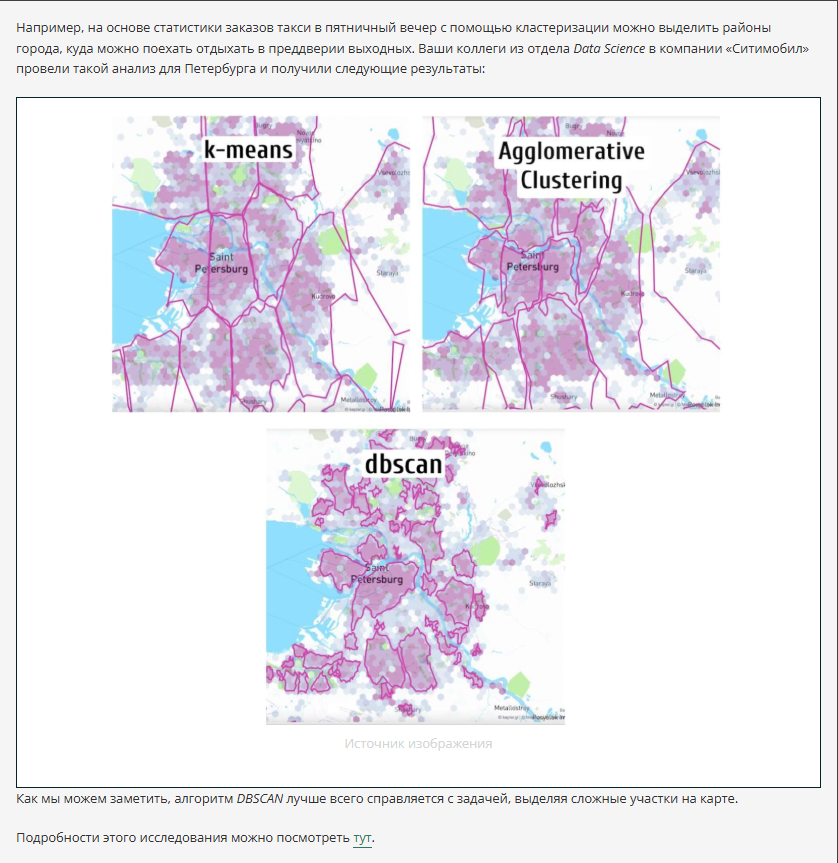

### Как запустить DBSCAN в sklearn?

Запуск алгоритма довольно простой и похож на запуск k-means. Вновь обратимся к нашему датасету с покемонами.

In [4]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

KeyError: "None of [Index(['Attack', 'Defense'], dtype='object')] are in the [columns]"

Основные параметры для запуска **DBSCAN:**

- *eps* — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
- *min_samples* — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

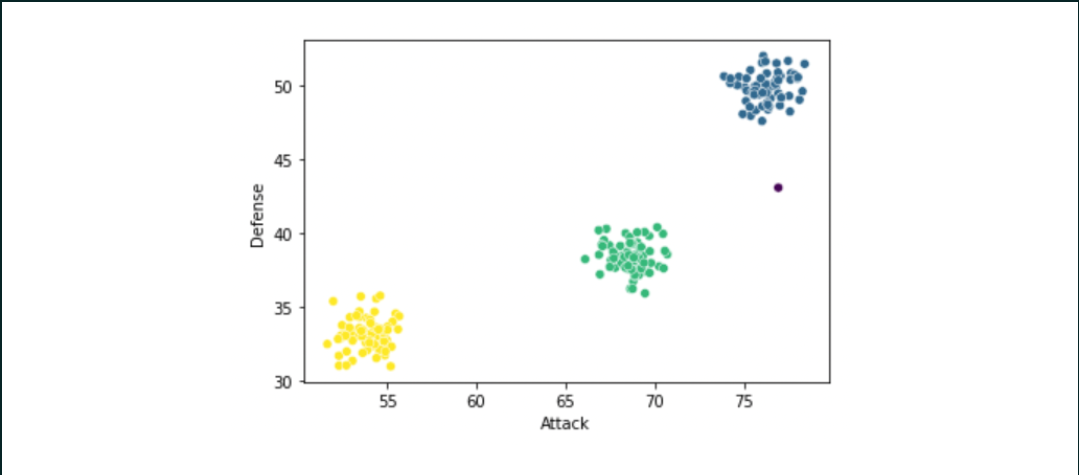

В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.

### Преимущества и недостатки DBSCAN

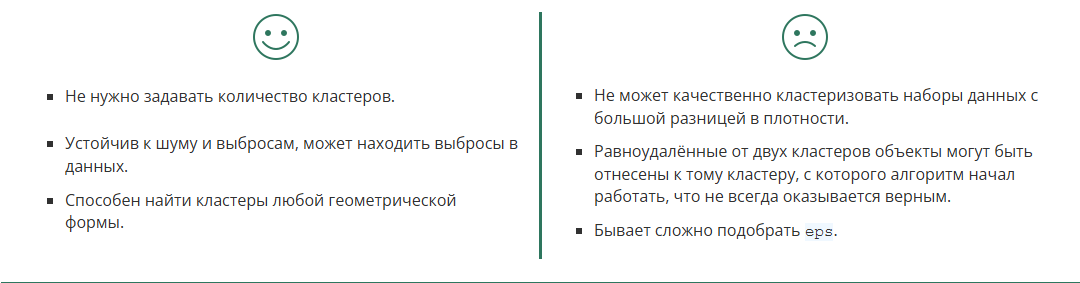

Итак, мы рассмотрели наиболее популярные алгоритмы кластеризации. Давайте подведём итог и соберём основную информацию по разным видам кластеризации в таблицу:

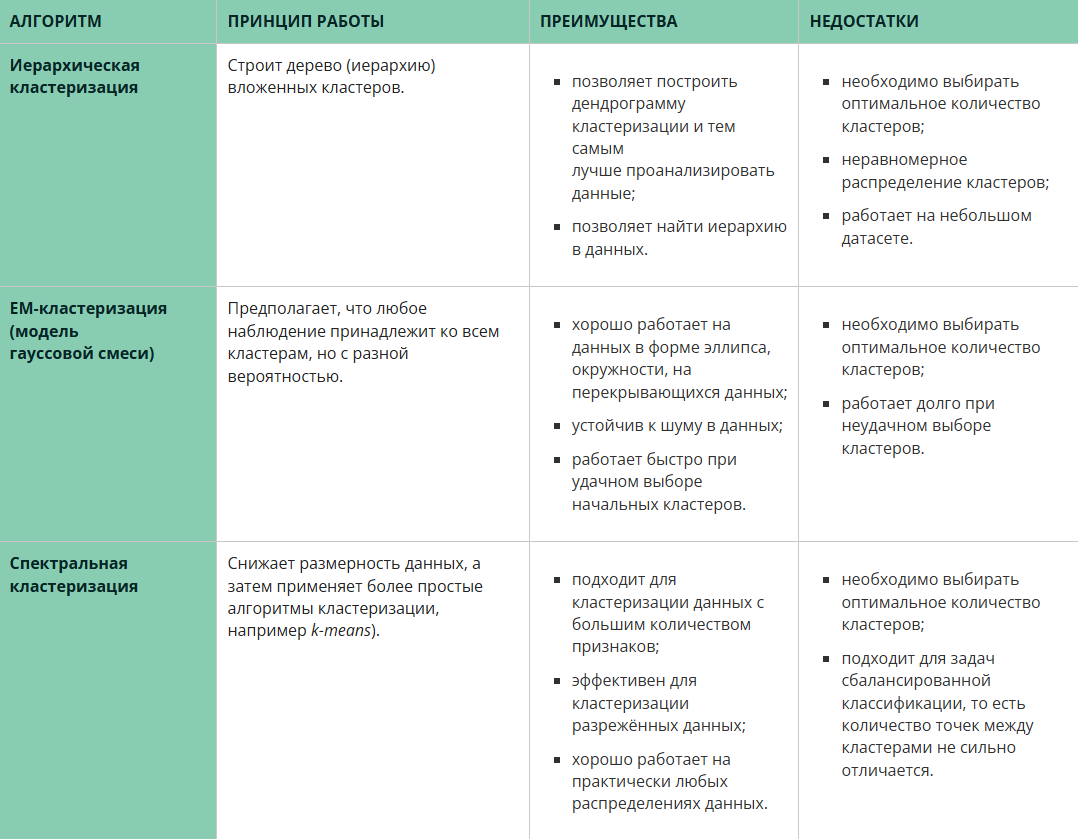
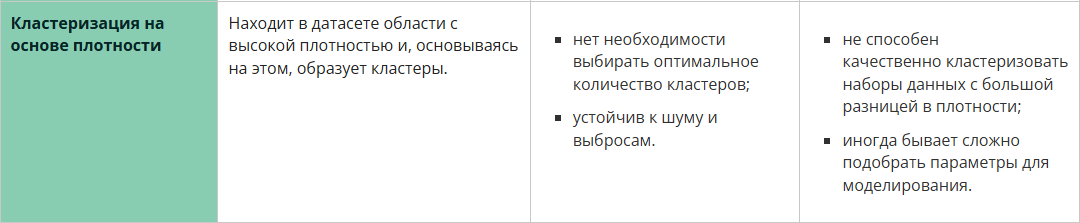

### Задание 7.2

От каких параметров зависят результаты работы алгоритма DBSCAN?

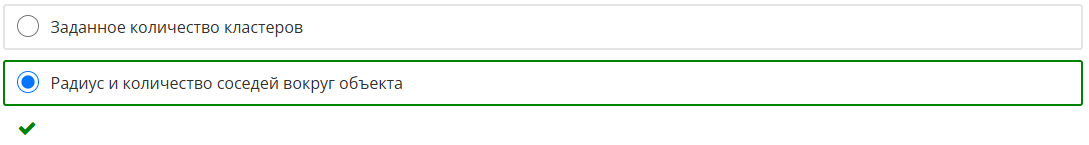

### Задание 7.3

Выберите верные утверждения об алгоритме *DBSCAN:*

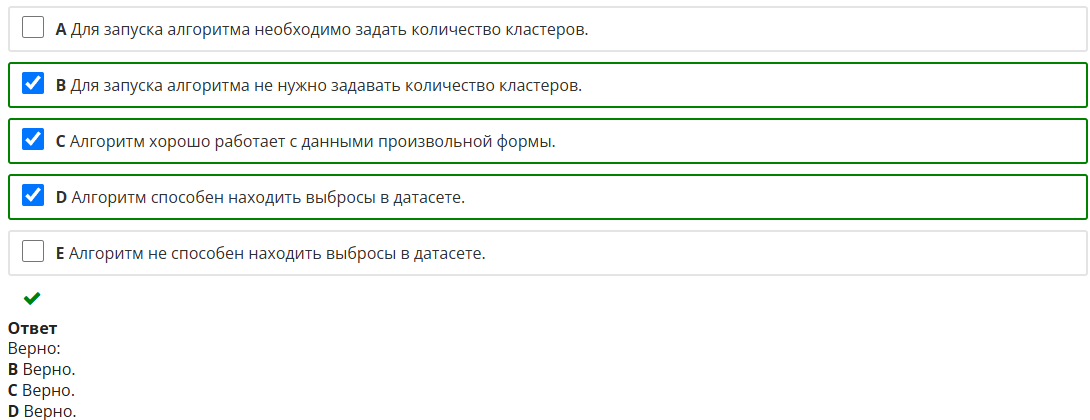

### Задание 7.4

Какой алгоритм кластеризации способен находить выбросы в данных?

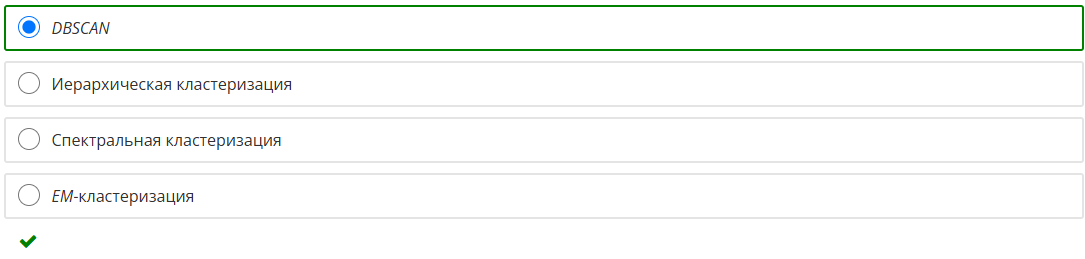

### Задание 7.5

Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

In [6]:
df

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


<Axes: xlabel='year', ylabel='price'>

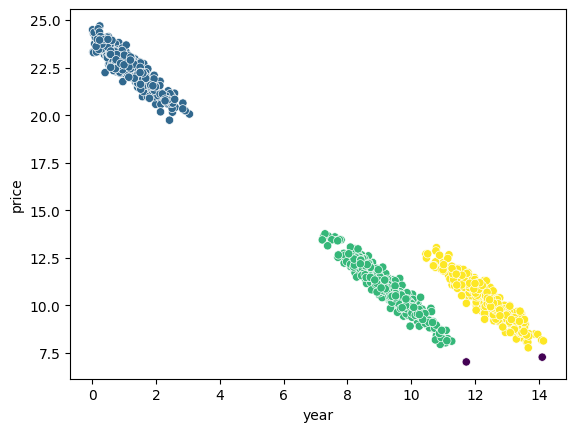

In [14]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/housing.csv')
# Запускаем кластеризацию на наших данных
clustering = DBSCAN().fit(df)

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df['year'], y=df['price'], c=clustering.labels_)

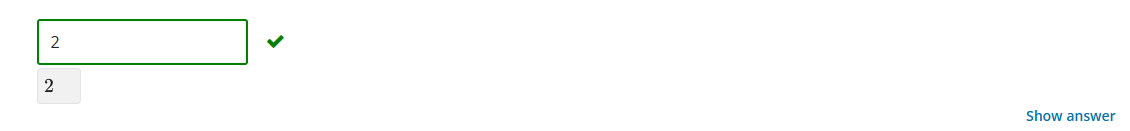

### Задание 7.6

В предыдущем задании алгоритм DBSCAN ошибочно определил точку у жёлтого кластера как выброс. Так произошло потому, что алгоритм запускался с параметрами по умолчанию.

Какие значения параметров eps и min_samples подойдут для верной кластеризации данных?

<Axes: xlabel='year', ylabel='price'>

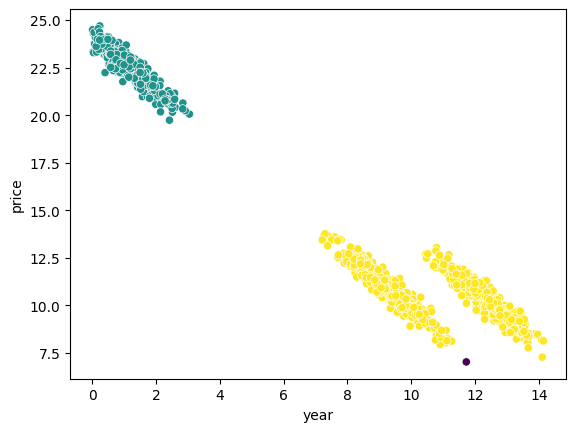

In [28]:
clustering = DBSCAN(eps=1.15, min_samples=2).fit(df)

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df['year'], y=df['price'], c=clustering.labels_)

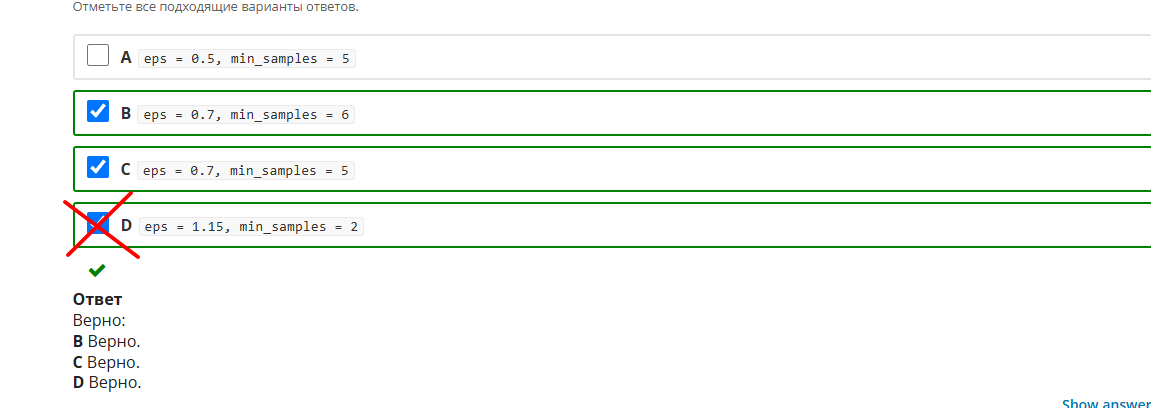